# Model Evaluation & Performance Improvement_2

## 2. Grid Search

Before, I have gone over about cross validation to get more generalized model. In this section, I am going to go over

how to tune parameters easily to make performance better. One of methods is grid search. In grid search, there is a grid to

place each value of each parameters, and then, calculate target value to compare all of combination in grid.

For example, Let's use SVC to tune C and gamma.

### 2.1 Simple Grid Search

In [1]:
# Data load
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

# Grid search
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("Best Score: {:.2f}".format(best_score))
print("Best param: {}".format(best_parameters))

Best Score: 0.97
Best param: {'C': 100, 'gamma': 0.001}


It realize simple grid search method. We made every combination of gamma and C and compare each score obtained by a test set.

We can understand how it works. But it's not ideal way to use grid search. Because We can't say this model is generalized.

Only one test set is used for evaluating. Rather than this process, We have to do cross validation to get more generalized model in

training set, and finally use test set only one time.

In [2]:
import mglearn
mglearn.plots.plot_grid_search_overview()

**Train** for construct, **dev** for tuning parameters, **test** for real test.

### 2.2 GridSearchCV in scikit-learn

This proess is provided by scikit-learn. By defining parameters to compare as dictionary, we can fine-tune parameters.

In [3]:
# Define grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Define grid search method
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

As it shows, cross-validation is available in GridSearchCV. It uses training set for cross-validation.

And we need to split another dataset for test set to get more objectivity.



In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [5]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV has **fit, predict and score** methods.
- fit
- predict
- score

In [6]:
print("Test Score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test Score: 0.97


Importantly, test set is not used for parameters.

Parameters is in 
- best_params_

and score is in 
- best_score_.

In [7]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.9732142857142857


To access to model directly to get model's method like feature importances

- best_estimators

In [8]:
print("Best model: \n{}".format(grid_search.best_estimator_))

Best model: 
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### 2.3 Visualization

We can transfrom result of grid search as dataframe or heat map. It helps us compare and explore which range of parameters has influence.

Normally, since its computational expense is large, Starting from rough range and small number of grid is recommended.

Result of grid search is in 

- cv_results_

In [9]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

C:\Anaconda_\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda_\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda_\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda_\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acces

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001396,0.000798,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000490,0.000399,0.011371,0.002852
1,0.001396,0.000598,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000490,0.000488,0.011371,0.002852
2,0.001594,0.000401,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000488,0.000491,0.011371,0.002852
3,0.001197,0.000800,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000399,0.000400,0.011371,0.002852
4,0.001207,0.000598,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000418,0.000489,0.011371,0.002852


Draw mean_test_score to make heat map.

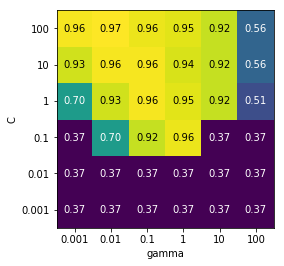

In [10]:
import numpy as np
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', 
                      yticklabels=param_grid['C'], cmap="viridis")